# Data Cleaning

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_excel('Online Retail.xlsx')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [17]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [18]:
# Drop rows where CustomerID or Description is missing
df_cleaned = df.dropna(subset=['CustomerID', 'Description'])

In [19]:
# Remove any duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

In [20]:
# Verify that the cleaning was successful
print("\nCleaned Dataset Info:")
df_cleaned.info()


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


# EDA

In [21]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics:\n", df_cleaned.describe())

Descriptive Statistics:
             Quantity                    InvoiceDate      UnitPrice  \
count  401604.000000                         401604  401604.000000   
mean       12.183273  2011-07-10 12:08:23.848567552       3.474064   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-29 15:40:00       1.950000   
75%        12.000000            2011-10-20 11:58:30       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       250.283037                            NaN      69.764035   

          CustomerID  
count  401604.000000  
mean    15281.160818  
min     12346.000000  
25%     13939.000000  
50%     15145.000000  
75%     16784.000000  
max     18287.000000  
std      1714.006089  


In [22]:
# Find the top 10 most sold products by quantity
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Most Sold Products:\n", top_products)


Top 10 Most Sold Products:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64


In [23]:
# Convert the InvoiceDate column to datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extract the month and year from InvoiceDate
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Aggregate by month and visualize total sales over time
monthly_sales = df_cleaned.groupby('Month')['Quantity'].sum()

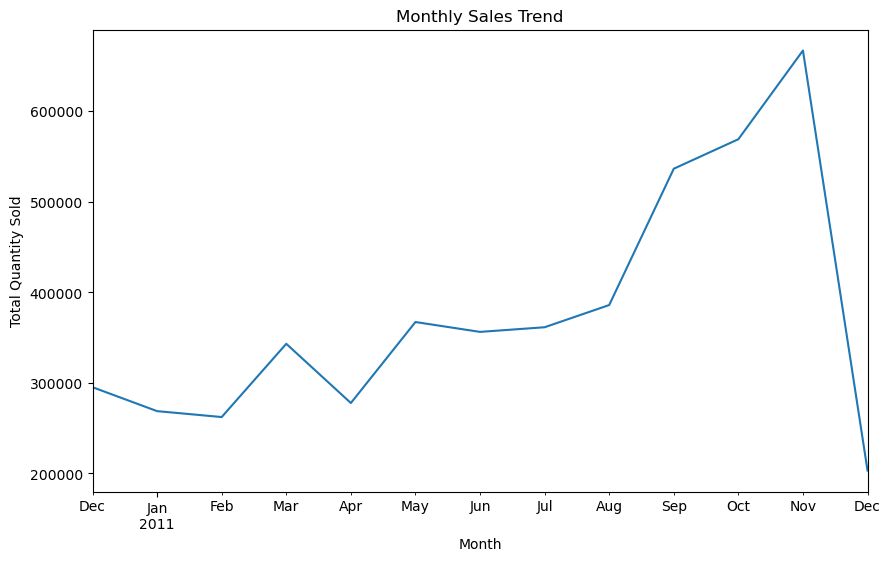

In [24]:
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Month')
plt.show()

# Feature Engineering

In [25]:
# Create a new column for total purchase value
df_cleaned['TotalPurchase'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Display the first few rows to verify
print("\nFirst Few Rows with Total Purchase Value:\n", df_cleaned[['InvoiceNo', 'TotalPurchase']].head())


First Few Rows with Total Purchase Value:
   InvoiceNo  TotalPurchase
0    536365          15.30
1    536365          20.34
2    536365          22.00
3    536365          20.34
4    536365          20.34


In [26]:
# Extract the day of the week and hour from InvoiceDate
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.day_name()
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour

# Display the first few rows with the new features
print("\nFirst Few Rows with Day of Week and Hour:\n", df_cleaned[['InvoiceNo', 'DayOfWeek', 'Hour']].head())


First Few Rows with Day of Week and Hour:
   InvoiceNo  DayOfWeek  Hour
0    536365  Wednesday     8
1    536365  Wednesday     8
2    536365  Wednesday     8
3    536365  Wednesday     8
4    536365  Wednesday     8


# Customer Segmentation(K-Means)

In [27]:
from sklearn.cluster import KMeans

# Group by customer to get their total spend and total quantity bought
customer_data = df_cleaned.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalPurchase': 'sum'
}).reset_index()

In [28]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Quantity', 'TotalPurchase']])

# Use KMeans to cluster customers
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Display the first few rows with customer segmentation
print("\nCustomer Segmentation:\n", customer_data.head())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Customer Segmentation:
    CustomerID  Quantity  TotalPurchase  Cluster
0     12346.0         0           0.00        0
1     12347.0      2458        4310.00        0
2     12348.0      2341        1797.24        0
3     12349.0       631        1757.55        0
4     12350.0       197         334.40        0


# Customer Cluster Visualization

In [29]:
import seaborn as sns

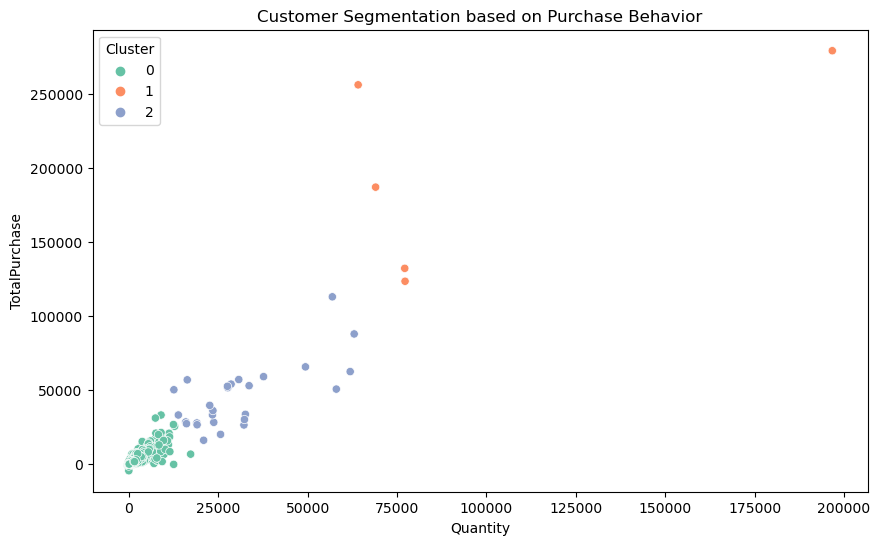

In [30]:
# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_data, x='Quantity', y='TotalPurchase', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation based on Purchase Behavior')
plt.show()

# Predictive Modeling

# Preparing Data for Predictive Modeling

In [57]:
print("Columns in the dataset:\n", df_cleaned.columns)

Columns in the dataset:
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'TotalPurchase',
       'DayOfWeek', 'Hour'],
      dtype='object')


In [58]:
# Assuming you want to predict if TotalPurchase > 0 (a purchase was made)
df_cleaned['PurchaseMade'] = df_cleaned['TotalPurchase'].apply(lambda x: 1 if x > 0 else 0)

# Verify the new column
print(df_cleaned[['TotalPurchase', 'PurchaseMade']].head())

   TotalPurchase  PurchaseMade
0          15.30             1
1          20.34             1
2          22.00             1
3          20.34             1
4          20.34             1


In [59]:
# Define features and target variable
X = df_cleaned[['Quantity', 'TotalPurchase', 'Hour']]  # Include additional features as needed
y = df_cleaned['PurchaseMade']  # Ensure this column exists

# Convert categorical features to numerical
label_encoder = LabelEncoder()
X['DayOfWeek'] = label_encoder.fit_transform(df_cleaned['DayOfWeek'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\Tech Assignment 02\AppData\Local\Temp\ipykernel_9864\832326012.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DayOfWeek'] = label_encoder.fit_transform(df_cleaned['DayOfWeek'])


In [61]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 445.2 kB/s eta 0:04:41
   ---------------------------------------- 0.1/124.9 MB 550.5 kB/s eta 0:03:47
   ---------------------------------------- 0.2/124.9 MB 1.2 MB/s eta 0:01:47
   ---------------------------------------- 0.3/124.9 MB 1.8 MB/s eta 0:01:12
   ---------------------------------------- 0.7/124.9 MB 2.8 MB/s eta 0:00:46
   ---------------------------------------- 1.1/124.9 MB 4.0 MB/s eta 0:00:31
    --------------------------------------- 1.7/124.9 MB 5.2 MB/s eta 0:00:24
    ---------------------

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [63]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.99988380006972
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2613
           1       1.00      1.00      1.00    117869

    accuracy                           1.00    120482
   macro avg       1.00      1.00      1.00    120482
weighted avg       1.00      1.00      1.00    120482



In [64]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2613
           1       1.00      1.00      1.00    117869

    accuracy                           1.00    120482
   macro avg       1.00      1.00      1.00    120482
weighted avg       1.00      1.00      1.00    120482



In [65]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

C:\Users\Tech Assignment 02\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:07:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.99995020002988
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2613
           1       1.00      1.00      1.00    117869

    accuracy                           1.00    120482
   macro avg       1.00      1.00      1.00    120482
weighted avg       1.00      1.00      1.00    120482



In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define features and target variable
X = df_cleaned[['Quantity', 'Hour']]  # Include additional features as needed
y = df_cleaned['TotalPurchase']  # Continuous target variable

# Convert categorical features to numerical
label_encoder = LabelEncoder()
X['DayOfWeek'] = label_encoder.fit_transform(df_cleaned['DayOfWeek'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\Tech Assignment 02\AppData\Local\Temp\ipykernel_9864\2217677681.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DayOfWeek'] = label_encoder.fit_transform(df_cleaned['DayOfWeek'])


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 123138.73474023967
R^2 Score: 0.7424052729318672


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = df_cleaned[['Quantity', 'Hour']]
y = df_cleaned['TotalPurchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(use_label_encoder=False, eval_metric='mlogloss')
}

# Fit the models and calculate MSE
mse_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores[name] = mean_squared_error(y_test, y_pred)

# Print MSE scores
print("MSE Scores:", mse_scores)

C:\Users\Tech Assignment 02\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:19:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MSE Scores: {'Linear Regression': 123137.79518403675, 'Random Forest': 239729.16583393823, 'XGBoost': 309479.8273639555}


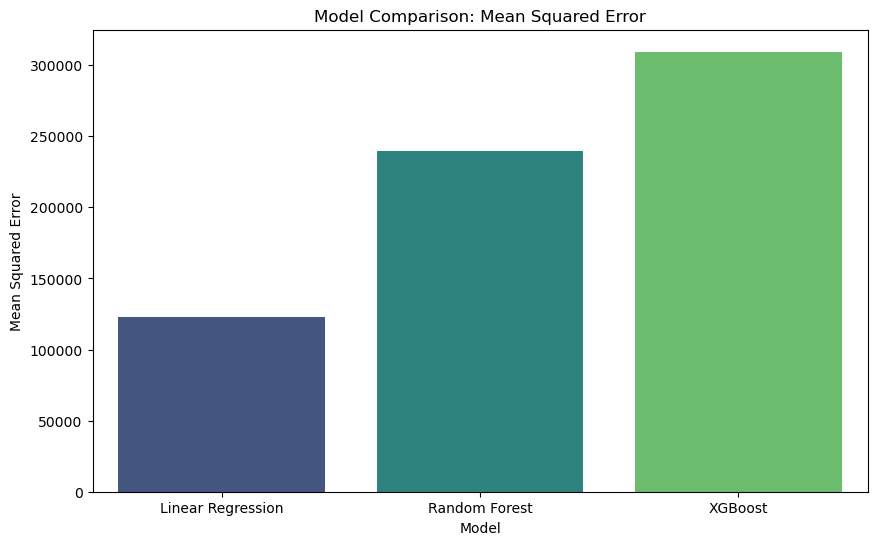

In [70]:
# Plotting the MSE scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(mse_scores.keys()), y=list(mse_scores.values()), palette='viridis')
plt.title('Model Comparison: Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

# Residual Plots

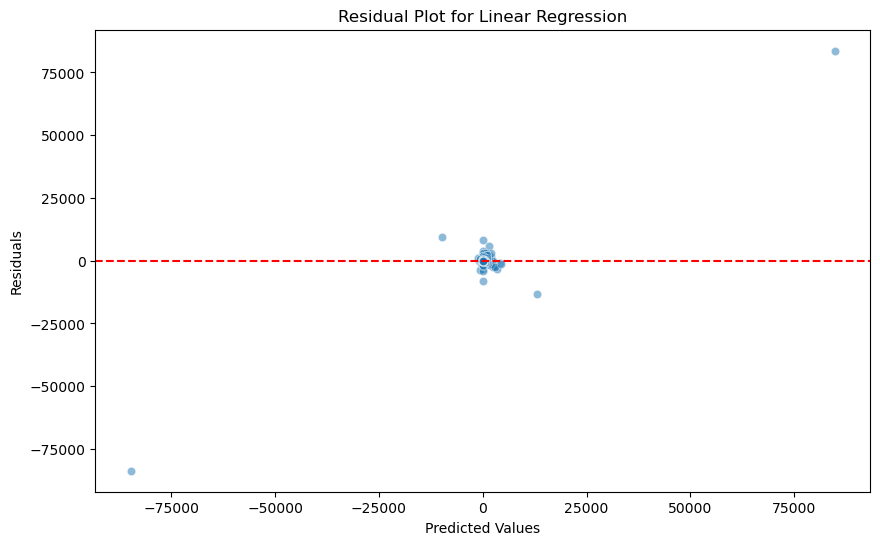

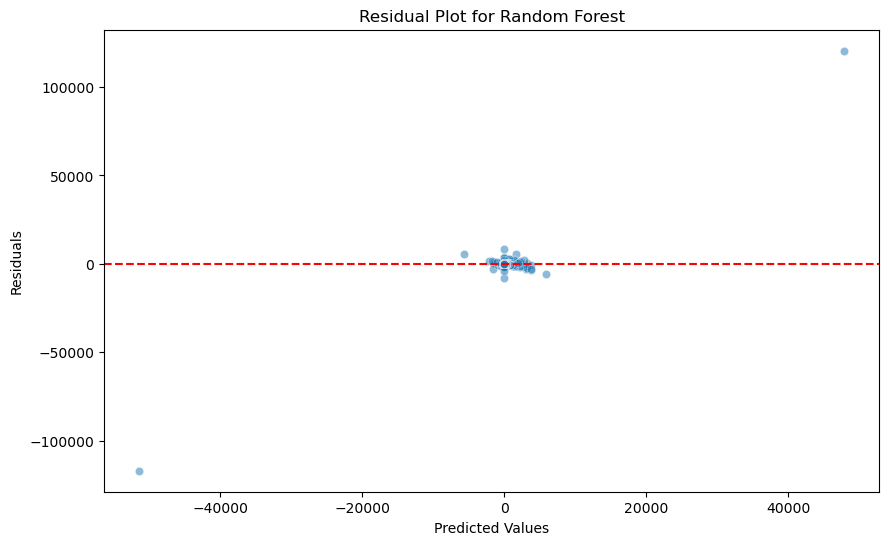

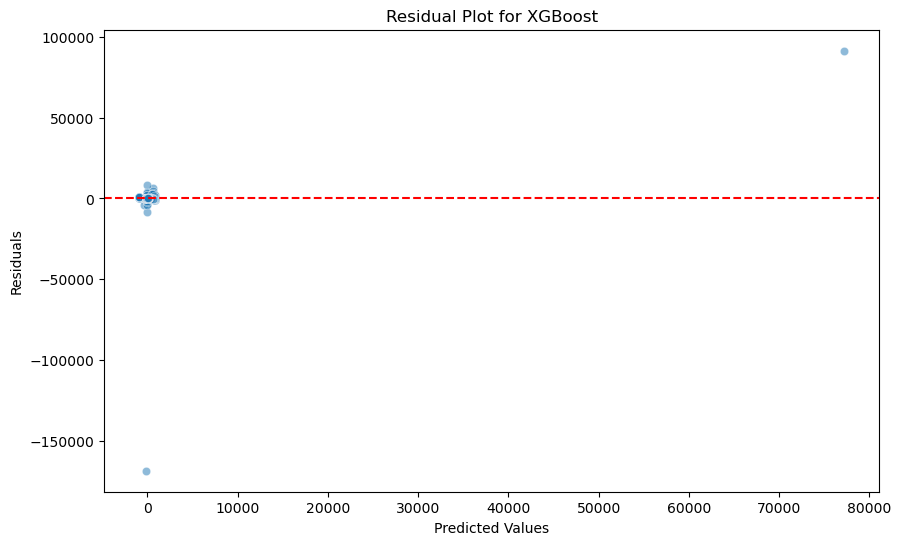

In [71]:
# Function to plot residuals
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

# Get predictions for each model and plot residuals
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_residuals(y_test, y_pred, name)

# Actual vs. Predicted Values

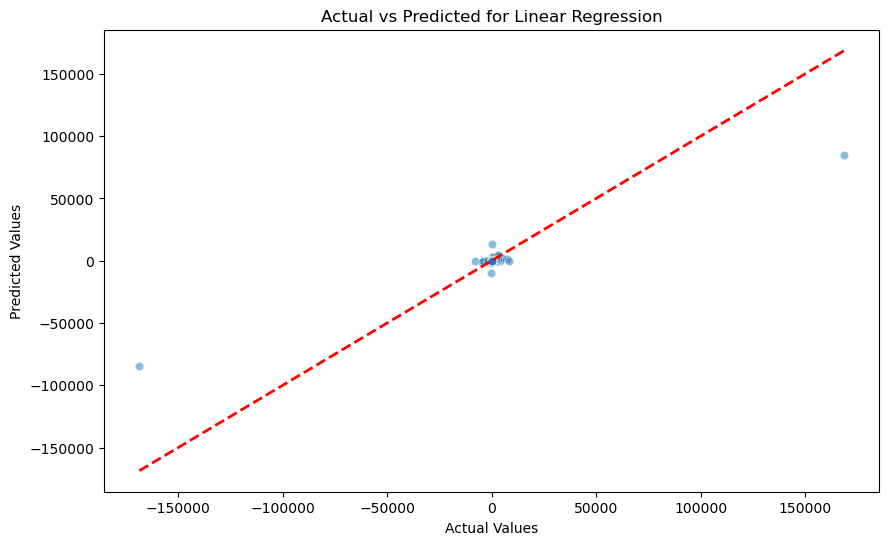

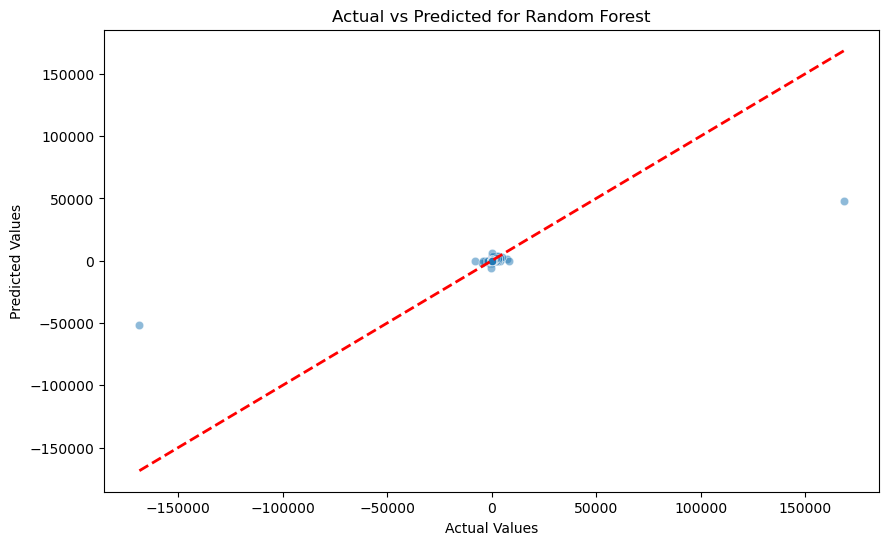

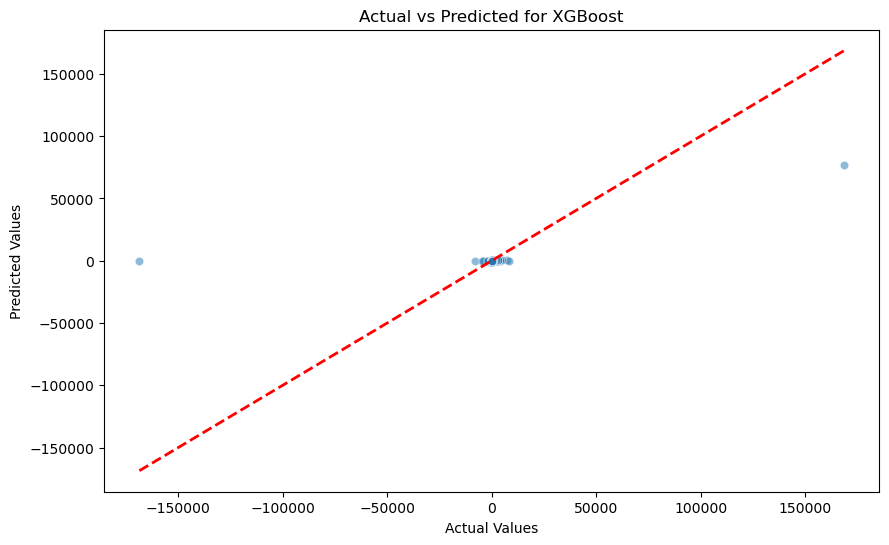

In [72]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Get predictions for each model and plot
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_actual_vs_predicted(y_test, y_pred, name)

# Feature Importance Bar Chart

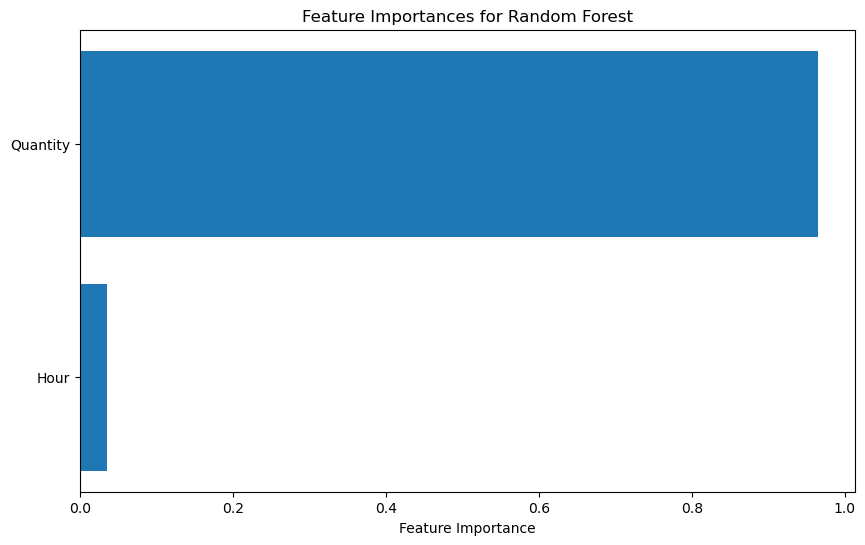

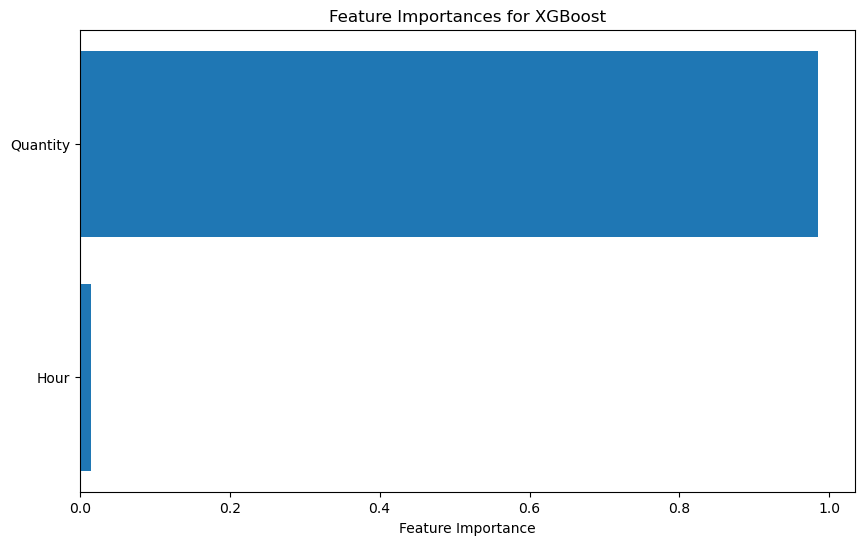

In [74]:
import numpy as np
# Function to plot feature importance
def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importances for {model_name}')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Feature Importance')
        plt.show()
    else:
        print(f"{model_name} does not have feature importances.")

# Plot feature importance for Random Forest and XGBoost
for name, model in models.items():
    if name in ['Random Forest', 'XGBoost']:
        plot_feature_importance(model, X.columns, name)

# Correlation Heatmap

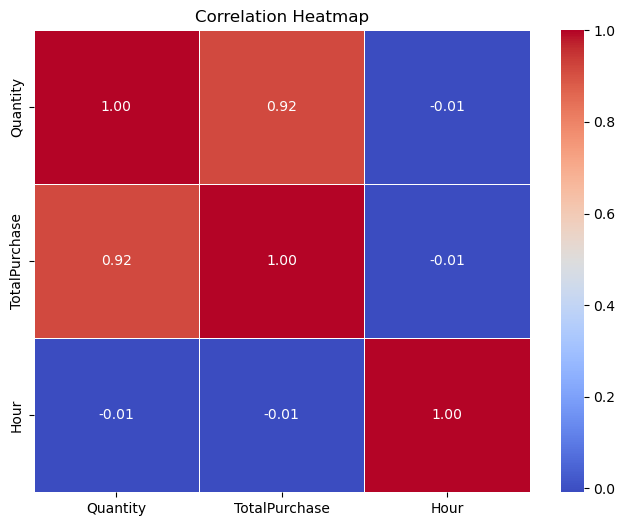

In [75]:
# Compute the correlation matrix
correlation_matrix = df_cleaned[['Quantity', 'TotalPurchase', 'Hour']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Learning Curve

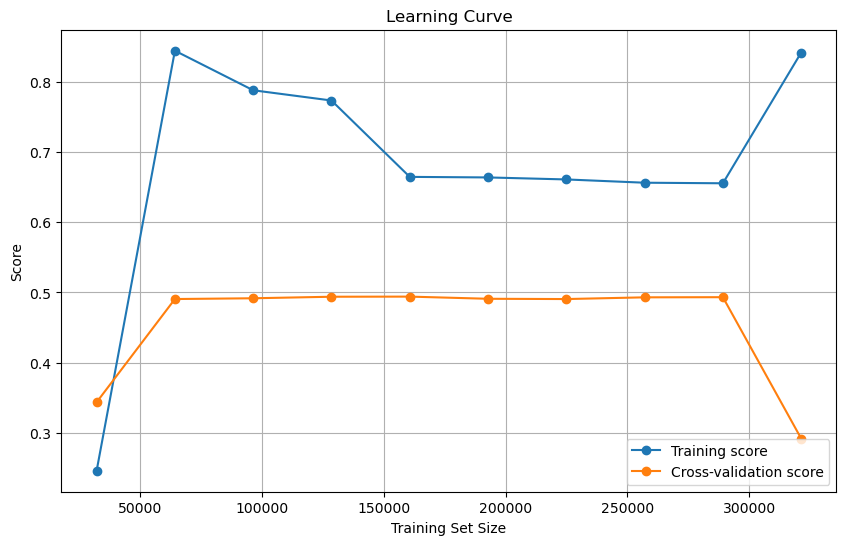

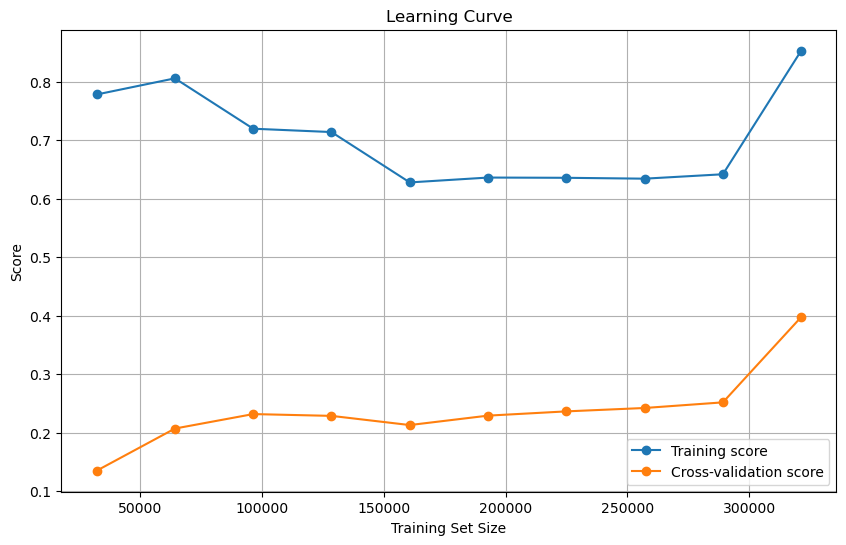

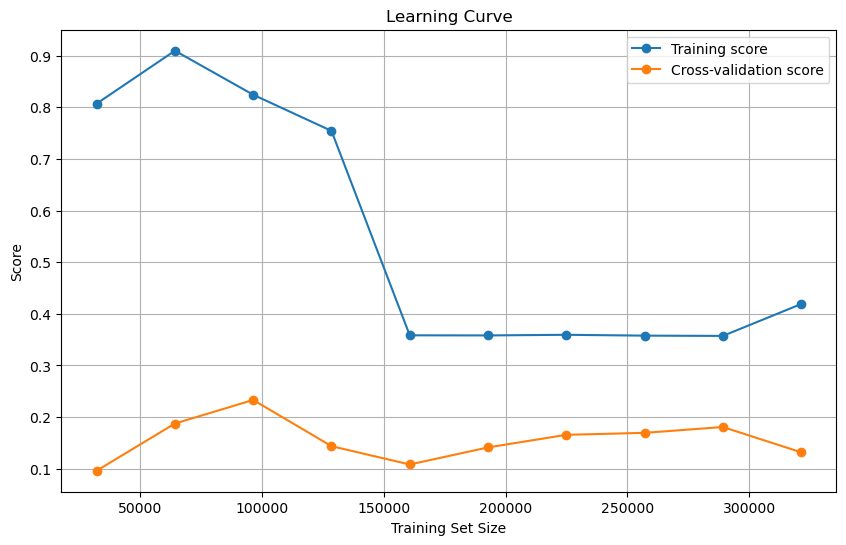

In [76]:
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot learning curves for each model
for name, model in models.items():
    plot_learning_curve(model, X, y)